In [1]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz

In [2]:
# import data
data = pd.read_csv('data.csv')
data.head()

,x,y
0,188.55,0.105961
1,576.55,-1.472254
2,716.25,-0.269416
3,931.85,2.976924
4,-993.00,0.348759


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40001 entries, 0 to 40000
Data columns (total 2 columns):
x    40001 non-null float64
y    40001 non-null float64
dtypes: float64(2)
memory usage: 625.1 KB


In [4]:
# sorting data
data.set_index('x', inplace=True)
data.sort_index(inplace=True)
data.head()

,y
x,
-1000.00,2.742532
-999.95,2.226679
-999.90,1.857893
-999.85,1.889464
-999.80,2.201328


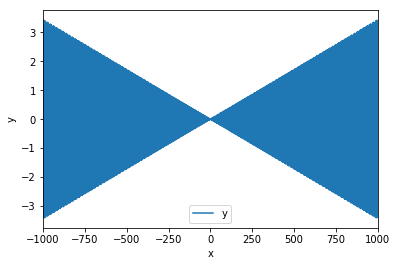

In [5]:
# visualizing data  
data.plot()
plt.ylabel('y')
plt.show()

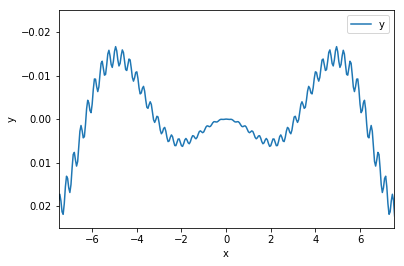

In [6]:
# zooming in
data.plot()
plt.ylabel('y')
plt.axis([-7.5,7.5,0.025,-0.025])
plt.show()

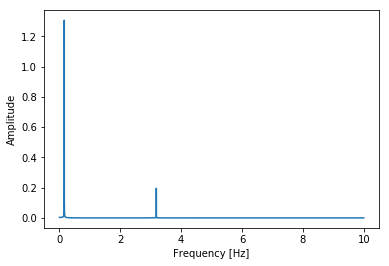

In [7]:
# Fourier transform to determine the cut off frequency
N = 40000 #number of data points
T = 0.05 #sample data spacing
yf = scipy.fftpack.fft(data['y'])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

In [8]:
# defining lowpass filter methods
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

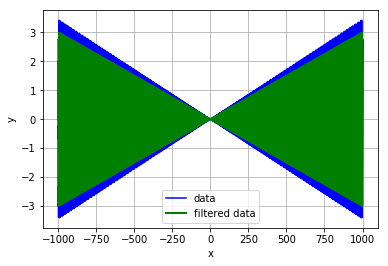

In [9]:
# Filter the data, and plot both the original and filtered signals
order = 6
fs = 1/0.05 #sample rate
cutoff = 1 #refer to frequency domain plot above

y = butter_lowpass_filter(data['y'], cutoff, fs, order)
t = np.linspace(-1000, 1000, 40001)

plt.plot(t, data['y'], 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

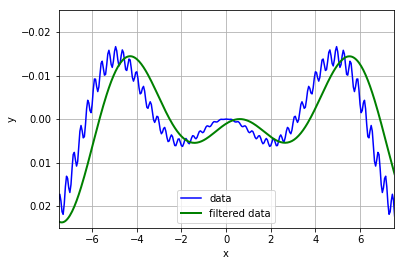

In [10]:
# zoom in
plt.plot(t, data['y'], 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.axis([-7.5,7.5,0.025,-0.025])
plt.show()

In [11]:
# define derivative function
def derivative(y, x):
    dydx = []
    for i in range(len(y)):
        if i == len(y) - 1:
            dydx.append('NA')
        else:
            der = round((y[i+1] - y[i])/(x[i+1] - x[i]), 4)
            dydx.append(der)
    return dydx

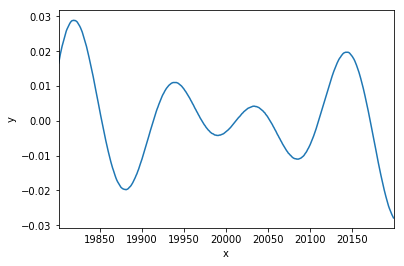

In [12]:
# take derivative of the filtered data and plot it
y_prime = derivative(y, t)

df = pd.DataFrame({'x': t, 'y': y_prime})
df_visualize = df.loc[(df['x'] > -10) & (df['x'] < 10), 'y']
df_visualize.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
# define integral function
def integral(t, y, a, b):
    #t = x
    #y = y
    #a = left bound
    #b = right bund
    df = pd.DataFrame({'x': t, 'y': y})
    df.set_index('x', inplace=True)
    df = df.loc[a:b]
    data_spacing = t[1]-t[0]
    i = 1
    #trapizoidal rule
    s = df.loc[a, 'y'] + df.loc[b, 'y']
    for y in df.loc[a+data_spacing:b-data_spacing, 'y']:
        if i % 2 == 0:
            s += 2 * y
        else:
            s += 4 * y
        i += 1
    return s * (data_spacing / 3.0)

In [14]:
# take integral of the filtered data
left_bound = -1000.00
right_bound = -900.00
a = integral(t, y, left_bound, right_bound)
print('integral: ', a)

integral:  -3.0370437026877064
